<a href="https://colab.research.google.com/github/Sanmatijain22/SCT_ML_01/blob/main/ML_TASKS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 1.9 MB/s eta 0:00:00


Saving Housing.csv to Housing (1).csv
✅ 'Housing.csv' loaded successfully.

🔍 First 5 rows of the dataset:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furn

<ipython-input-2-3395201557>:84: UserWarning: Glyph 127969 (\N{HOUSE WITH GARDEN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127969 (\N{HOUSE WITH GARDEN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


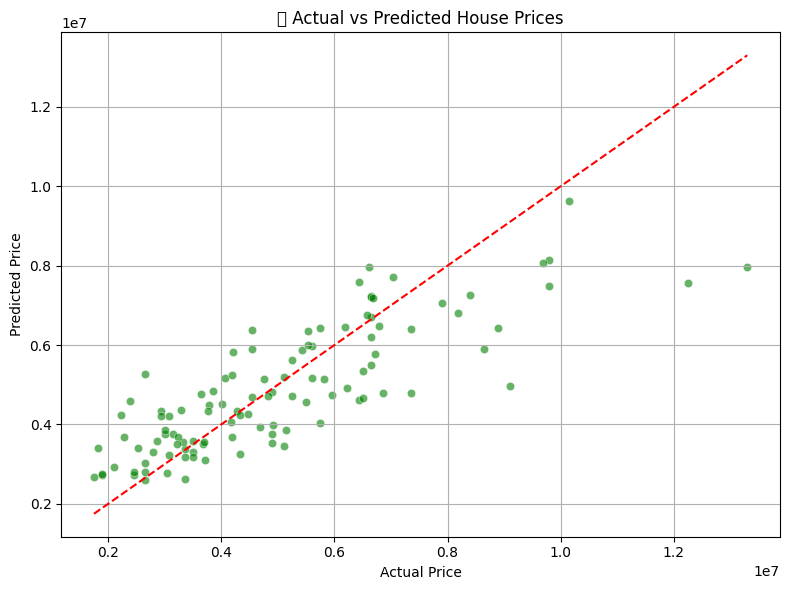


📌 Top 10 Influential Features:
                         Feature   Coefficient
2                      bathrooms  1.094445e+06
3                        stories  4.074766e+05
13            airconditioning_no -3.957134e+05
12           airconditioning_yes  3.957134e+05
11           hotwaterheating_yes  3.423249e+05
10            hotwaterheating_no -3.423249e+05
16                   prefarea_no -3.149453e+05
15                  prefarea_yes  3.149453e+05
19  furnishingstatus_unfurnished -2.334694e+05
14                       parking  2.248419e+05


In [2]:
# ✅ STEP 1: Install required libraries
!pip install -q category_encoders

# ✅ STEP 2: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import category_encoders as ce

# ✅ STEP 3: Upload "Housing.csv" File
from google.colab import files
uploaded = files.upload()  # Upload your "Housing.csv" file here

# ✅ STEP 4: Read the CSV
df = pd.read_csv("Housing.csv")
print("✅ 'Housing.csv' loaded successfully.")

# ✅ STEP 5: Basic Data Exploration
print("\n🔍 First 5 rows of the dataset:")
print(df.head())

print("\n🧾 Data types and non-null info:")
print(df.info())

print("\n📊 Statistical Summary:")
print(df.describe())

# ✅ STEP 6: Handle Missing Values
print("\n🧼 Missing values per column:")
print(df.isnull().sum())

# Drop rows with missing values (if any)
df = df.dropna()

# ✅ STEP 7: Feature Identification
numerical_cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
                    'airconditioning', 'prefarea', 'furnishingstatus']

# ✅ STEP 8: Encode Categorical Features
encoder = ce.OneHotEncoder(cols=categorical_cols, use_cat_names=True)
df_encoded = encoder.fit_transform(df)

# ✅ STEP 9: Define Features (X) and Target (y)
X = df_encoded.drop(columns=['price'])
y = df_encoded['price']

# ✅ STEP 10: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)
print("\n📂 Training and testing sets created.")

# ✅ STEP 11: Train Model
model = LinearRegression()
model.fit(X_train, y_train)
print("✅ Linear Regression model trained.")

# ✅ STEP 12: Predict
y_pred = model.predict(X_test)

# ✅ STEP 13: Evaluate Model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\n📈 Model Performance:")
print(f"🔹 Mean Absolute Error (MAE): {mae:,.2f}")
print(f"🔹 Root Mean Squared Error (RMSE): {rmse:,.2f}")
print(f"🔹 R² Score: {r2:.4f}")

# ✅ STEP 14: Actual vs Predicted Plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, color='green', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("🏡 Actual vs Predicted House Prices")
plt.grid(True)
plt.tight_layout()
plt.show()

# ✅ STEP 15: View Model Coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

print("\n📌 Top 10 Influential Features:")
print(coef_df.head(10))
